In [1]:
import pickle
import tempfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
import itertools

In [2]:
with open('text_data.pickle', "rb") as file:
        data = pickle.load(file)

In [3]:
len(data[0])

20761

In [4]:
sen = data[0]
lab = data[1]

In [5]:
train_data = [sen[0:17000], lab[0:17000]]
test_data = [sen[17000:], lab[17000:]]

In [6]:
corpus = []
for i in train_data[0]:
    t = ' '.join(i)
    corpus.append(t)
test_corpus = []
for i in test_data[0]:
    t = ' '.join(i)
    test_corpus.append(t)

In [7]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
y_train = np.array(train_data[1])
X_train.shape, y_train.shape

((17000, 99108), (17000,))

In [8]:
X_test = vectorizer.transform(test_corpus)
y_test = np.array(test_data[1])
X_test.shape, y_test.shape

((3761, 99108), (3761,))

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.868
[[1812   29]
 [ 469 1451]]
Confusion matrix, without normalization


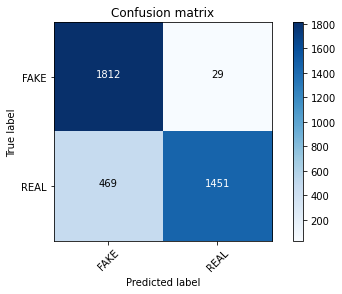

In [10]:
clf = MultinomialNB() 
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
print(cm)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])